<a href="https://colab.research.google.com/github/goyetc/DL_MNIST/blob/master/CG2970_part1_sequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Applied Deep Learning Homework 1 - Part 1 - Sequential
* Colin Goyette - cg2970


##Pre-work.. import data, observe shape, etc.

In [0]:
from __future__ import absolute_import, division, print_function

In [0]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.0-rc1


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

In [0]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
len(train_labels)

60000

In [0]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
test_images.shape

(10000, 28, 28)

In [0]:
len(test_labels)

10000

In [0]:
test_labels[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

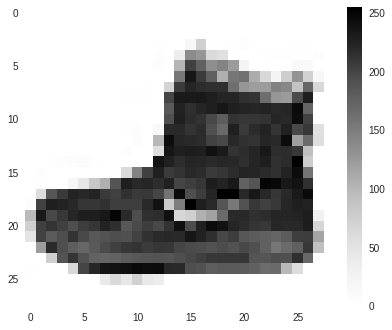

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

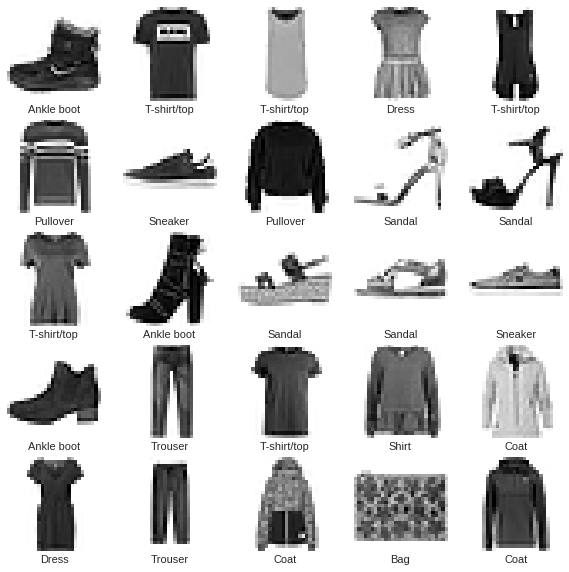

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## P1-1 Linear classifier using sequential api
* Interesting note.. epochs really don't make a difference here, one pass through the training data was sufficient

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    #single dense layer taking input dim, after flatten, of 784 (28x28)
    keras.layers.Dense(10, activation=tf.nn.softmax) #one set of weights per target level
])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
history = model.fit(train_images, train_labels, epochs = 10, validation_data = (test_images, test_labels))
history

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 58us/sample - loss: 0.6017 - acc: 0.7990 - val_loss: 0.5073 - val_acc: 0.8272
Epoch 2/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.4613 - acc: 0.8414 - val_loss: 0.4794 - val_acc: 0.8313
Epoch 3/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.4359 - acc: 0.8510 - val_loss: 0.4736 - val_acc: 0.8346
Epoch 4/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.4216 - acc: 0.8549 - val_loss: 0.4583 - val_acc: 0.8396
Epoch 5/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.4138 - acc: 0.8564 - val_loss: 0.4545 - val_acc: 0.8397
Epoch 6/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.4070 - acc: 0.8590 - val_loss: 0.4520 - val_acc: 0.8431
Epoch 7/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.4027 - acc: 0.8605 - val_loss: 0.

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Linear Classifier }Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 36us/sample - loss: 0.4612 - acc: 0.8381
Linear Classifier }Test accuracy: 0.8381


### Accuracy and loss of train/validation set for linear classifier

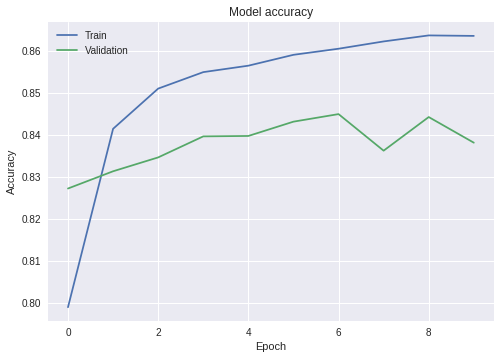

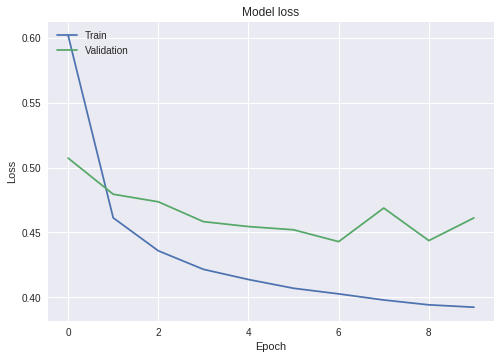

In [0]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

### Note that I chose to stop here, at 10 epochs, because the validation accuracy and loss started to "waffle" around this time

## P1-2 Train DNN
* Note that a second dense layer was added to the base template from the tutorial
* This was based on this article on the mnist fashion data set: https://medium.com/tensorist/classifying-fashion-articles-using-tensorflow-fashion-mnist-f22e8a04728a
* 6 epochs is likely excessive, a chart showing train and validation accuracy is produced to confirm overfitting present

In [0]:
model_dnn = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
  
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
model_dnn.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model_dnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [0]:
history_dnn = model_dnn.fit(train_images, train_labels, epochs = 6, validation_data = (test_images, test_labels))
history_dnn

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 10s 164us/sample - loss: 0.4871 - acc: 0.8243 - val_loss: 0.4061 - val_acc: 0.8574
Epoch 2/6
60000/60000 [==============================] - 10s 167us/sample - loss: 0.3669 - acc: 0.8654 - val_loss: 0.3707 - val_acc: 0.8643
Epoch 3/6
60000/60000 [==============================] - 10s 159us/sample - loss: 0.3299 - acc: 0.8771 - val_loss: 0.3813 - val_acc: 0.8607
Epoch 4/6
60000/60000 [==============================] - 10s 166us/sample - loss: 0.3060 - acc: 0.8863 - val_loss: 0.3610 - val_acc: 0.8670
Epoch 5/6
60000/60000 [==============================] - 10s 164us/sample - loss: 0.2896 - acc: 0.8923 - val_loss: 0.4118 - val_acc: 0.8479
Epoch 6/6
60000/60000 [==============================] - 9s 154us/sample - loss: 0.2747 - acc: 0.8964 - val_loss: 0.3363 - val_acc: 0.8777


In [0]:
test_loss, test_acc = model_dnn.evaluate(test_images, test_labels)
print('')
print('Validation accuracy:', test_acc)

10000/10000 [==============================] - 0s 47us/sample - loss: 0.3363 - acc: 0.8777

Validation accuracy: 0.8777


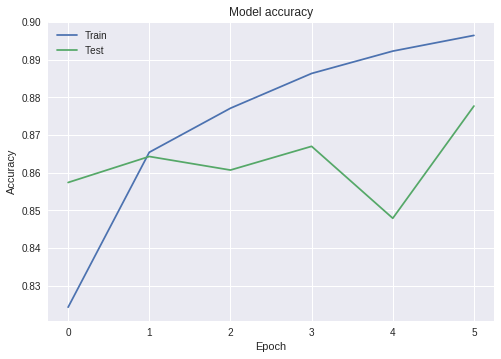

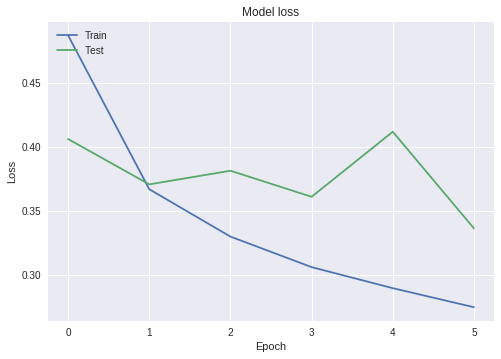

In [0]:
# Plot training & validation accuracy values
plt.plot(history_dnn.history['acc'])
plt.plot(history_dnn.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Plot training & validation loss values
plt.plot(history_dnn.history['loss'])
plt.plot(history_dnn.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

##P1-3: Diagram to visualize linear and deep models

In [0]:
!pip install pydot

In [0]:
import matplotlib.image as mpimg

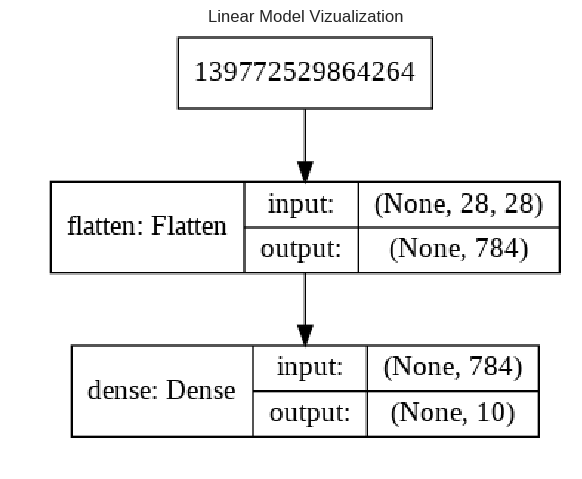

In [0]:

## Linear Model Viz
image_path = 'model.png'
keras.utils.plot_model(model, 
                       show_shapes=True,
                       to_file=image_path)

plt.figure(dpi=100)
imgplot = plt.imshow(mpimg.imread(image_path))
plt.axis('off')
plt.title('Linear Model Vizualization')
plt.show()

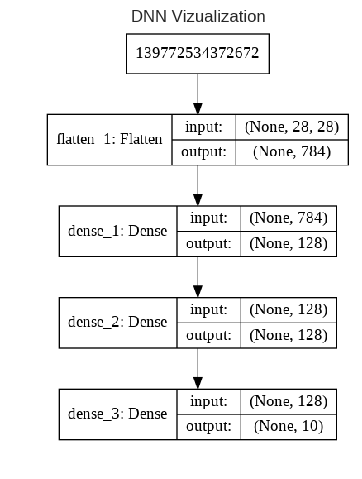

In [0]:

## Deep Neural Network Viz
image_path = 'model_dnn.png'
keras.utils.plot_model(model_dnn, 
                       show_shapes=True,
                       to_file=image_path)

plt.figure(dpi=100)
imgplot = plt.imshow(mpimg.imread(image_path))
plt.axis('off')
plt.title('DNN Vizualization')
plt.show()

##P1-4 Confusion Matrix - For DNN
* We use actual labels (re-converted to label from one-hot encoding using np.argmax) and predicted labels with sklearn code provided
* Both non-normalized and normalized versions included

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


In [0]:
predictions = model_dnn.predict(test_images)

In [0]:
from sklearn.metrics import confusion_matrix
import itertools

In [0]:
test_labels.shape, predictions.shape

((10000,), (10000, 10))

In [0]:
predictions[10,:]

array([6.2431413e-05, 3.8912940e-06, 1.0634286e-02, 3.6291087e-06,
       9.7825032e-01, 5.4829062e-08, 1.1029256e-02, 2.6626854e-09,
       1.6162825e-05, 1.0705559e-08], dtype=float32)

Use np.argmax to return one-hot encoding to label/class list 

In [0]:
pred_label = np.argmax(predictions, axis=1)

In [0]:
pred_label, pred_label.shape

(array([9, 2, 1, ..., 8, 1, 5]), (10000,))

Now that predictions are in correct format.. 

Confusion matrix, without normalization
[[837   1  14  22   7   1 107   0  11   0]
 [  1 963   0  29   5   0   1   0   1   0]
 [ 15   0 698  16 215   0  56   0   0   0]
 [ 22   5   8 915  25   0  21   0   4   0]
 [  1   1  39  44 888   0  26   0   1   0]
 [  0   0   0   0   0 976   0  15   0   9]
 [118   1  75  35 137   0 618   0  16   0]
 [  0   0   0   0   0  22   0 960   0  18]
 [  3   0   5   5   5   3   1   4 974   0]
 [  0   0   0   1   0   7   1  43   0 948]]
Normalized confusion matrix
[[0.84 0.   0.01 0.02 0.01 0.   0.11 0.   0.01 0.  ]
 [0.   0.96 0.   0.03 0.01 0.   0.   0.   0.   0.  ]
 [0.01 0.   0.7  0.02 0.21 0.   0.06 0.   0.   0.  ]
 [0.02 0.01 0.01 0.92 0.03 0.   0.02 0.   0.   0.  ]
 [0.   0.   0.04 0.04 0.89 0.   0.03 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.98 0.   0.01 0.   0.01]
 [0.12 0.   0.07 0.04 0.14 0.   0.62 0.   0.02 0.  ]
 [0.   0.   0.   0.   0.   0.02 0.   0.96 0.   0.02]
 [0.   0.   0.01 0.01 0.01 0.   0.   0.   0.97 0.  ]
 [0.   0.   0.   0.   0.

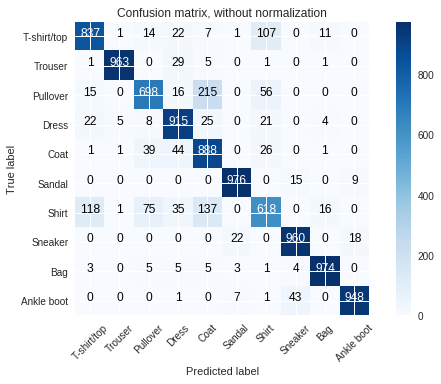

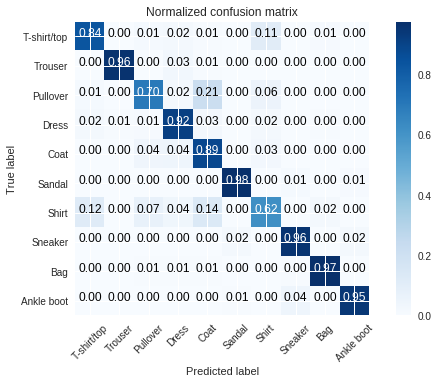

In [0]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels, pred_label)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Per confusion matrices above, it shouldn't come as too much of a surprise that "t-shirt/top" is frequently confused with "shirt", and vice versa